In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
from datetime import datetime

In [15]:
df_info = pd.read_csv('clean_data.csv')
df_info

,Id,Title,Price(Triệu/tháng),Square(m²),District,City,Date
0,478324,Cho thuê phòng để ở tại 108/64A1 Trần Quang Di...,3.50,18.0,Quận 3,Hồ Chí Minh,\r20/06/2020
1,723089,"Phòng trọ,căn hộ mini đầy đủ tiện nghi ngay tr...",6.00,70.0,Quận 4,Hồ Chí Minh,\r21/11/2018
2,728993,Phòng vừa xây xong thoáng mát gần các trường Đ...,3.30,25.0,Quận 7,Hồ Chí Minh,\r17/10/2018
3,745037,Cho nam thuê phòng (ghép) tại quận 10. Nhà ở t...,1.45,8.0,Quận 10,Hồ Chí Minh,\r03/10/2018
4,781296,Cần share lại gấp phòng trọ mới thuê tại đường...,3.00,15.0,Quận 10,Hồ Chí Minh,\r05/10/2018
...,...,...,...,...,...,...,...
1180,2112161,"Nhà mới xây, Miễn phí cầu thang máy, điều hòa,...",2.80,25.0,Bình Tân,Hồ Chí Minh,\r15/11/2022
1181,2113773,Cho thuê phòng trọ tại phường 12 - gò vấp,5.50,20.0,Gò Vấp,Hồ Chí Minh,\r17/11/2022
1182,2118730,Cho thuê giường kén CAPSULE CAO CẤP SMART _ Tr...,2.80,30.0,Quận 3,Hồ Chí Minh,\r24/11/2022
1183,2119311,"Cho thuê phòng ĐẸP 16m2 đường Thành Thái-Q10, ...",5.00,16.0,Quận 10,Hồ Chí Minh,\r25/11/2022


In [16]:
df_info["Date"] = df_info["Date"].str.replace('\r','')
df_info["Date"] = pd.to_datetime(df_info["Date"],format = "%d/%m/%Y ",errors = 'coerce')

In [17]:
df_info["District"].unique()

array(['Quận 3', 'Quận 4', 'Quận 7', 'Quận 10', 'Tân Bình', 'Gò Vấp',
       'Phú Nhuận', 'Bình Thạnh', 'Nhà Bè', 'Quận 2', 'Tân Phú', 'Quận 1',
       'Quận 6', 'Thủ Đức', 'Quận 11', 'Bình Chánh', 'Bình Tân', 'Quận 5',
       'Quận 9', 'Hóc Môn', 'Quận 8', 'Quận 12', 'Củ Chi'], dtype=object)

Có một người đang có ý định đầu tư vào lĩnh vực cho thuê phòng trọ cho sinh viên. Sau khi tìm hiểu, người đó nhận ra rằng 3 khu vực có đông sinh viên nhất là Quận Thủ Đức, Quận Bình Thạnh và Quận 7. Để quyết định xem là nên đầu tư vào khu vực nào thì sẽ có lợi nhuận tốt nhất về lâu dài ( tức là giá thuê có sự tăng trưởng tốt nhất ), người đó muốn nhờ bạn chỉ ra xu hướng giá nhà thuê của các khu vực này theo các năm 2018, 2019, 2020, 2021, 2022. Nên nhớ là sinh viên chỉ có thể chi trả dưới 10 triệu/tháng, hãy tính chỉ số tăng trưởng cho từng quận qua các năm. Công thức của chỉ số này là 0.4*diện tích + 0.4*giá + 0.2*chỉ số giá trị (Q1: 3 QBT: 2 TD: 1 )

Đầu tiên, lọc ra những giá nhà của 3 quận này

In [26]:
df_q1_bt_q7 = df_info[(df_info['District'] == 'Quận 1') | (df_info['District'] == 'Quận 7') | (df_info['District'] == 'Bình Thạnh')]
df_q1_bt_q7

,Id,Title,Price(Triệu/tháng),Square(m²),District,City,Date
2,728993,Phòng vừa xây xong thoáng mát gần các trường Đ...,3.30,25.0,Quận 7,Hồ Chí Minh,2018-10-17
11,835953,KTX cho thuê tại 150 Nguyễn thị thập giá từ 450 k,0.45,25.0,Quận 7,Hồ Chí Minh,2018-09-29
14,836410,☆☆BẠN CÓ MUỐN Ở TRONG NHÀ NÀY KHÔNG? ☆NHÀ MẶT ...,6.00,20.0,Bình Thạnh,Hồ Chí Minh,2018-09-29
15,836668,Cho thuê KTX máy lạnh 450k/tháng ở xô viết ngh...,0.45,40.0,Bình Thạnh,Hồ Chí Minh,2018-09-29
20,840835,"Phòng ở ghép - ký túc xá cho sv, người đi làm ...",1.10,35.0,Bình Thạnh,Hồ Chí Minh,2018-10-12
...,...,...,...,...,...,...,...
1163,2063757,"Cho Thuê Phòng Đường Mai Văn Vĩnh, Quận 7,...",4.00,20.0,Quận 7,Hồ Chí Minh,2022-10-17
1169,2094225,Cho thuê phòng trọ có gác giá rẻ nhưng đầy đủ ...,3.70,15.0,Quận 7,Hồ Chí Minh,2022-10-24
1174,2109043,"Căn hộ 2T bancony ngay chợ Bà Chiểu, sát hàng ...",6.50,25.0,Bình Thạnh,Hồ Chí Minh,2022-11-11
1175,2109867,Căn hộ đẹp Tràn Ngập Tiện Nghi ngay trung tâm Q.1,6.00,30.0,Quận 1,Hồ Chí Minh,2022-11-12


Lọc ra những phòng có giá dưới 10 triệu

In [70]:
df_q1_bt_q7 = df_q1_bt_q7[df_q1_bt_q7['Price(Triệu/tháng)'] < 10]
df_q1_bt_q7[(df_q1_bt_q7['Id'] == 1443550)]['Title']

325    Cho thuê phòng cao cấp ở trung tâm quận 1 đầy ...
Name: Title, dtype: object

In [43]:
df_q1_bt_q7['Year'] = df_q1_bt_q7['Date'].array.year
df_q1_bt_q7[(df_q1_bt_q7['District'] == 'Quận 1') & (df_q1_bt_q7['Year'] == 2020)]['Price(Triệu/tháng)'].mean()

3.3562499999999997

Vẽ biểu đồ số lượng theo giá nhà

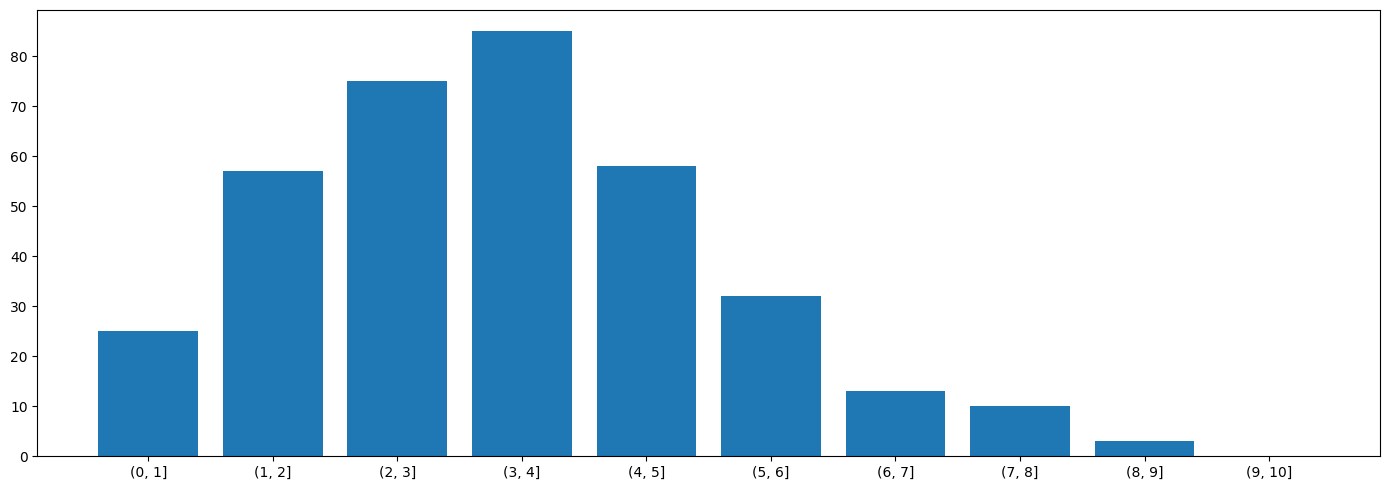

In [30]:
price_list_range = np.arange(0,11,1)

range_price_10 = pd.cut(df_q1_bt_q7["Price(Triệu/tháng)"],bins = price_list_range)

count_price_10 = range_price_10.value_counts().sort_index()
count_price_10 = count_price_10.reset_index()
count_price_10.columns = ["Range","So luong"]
count_price_10["Range"] = count_price_10["Range"].astype(str)

plt.subplots(figsize = (14,5))
plt.bar(count_price_10["Range"],count_price_10["So luong"])
plt.tight_layout()
plt.show()

In [61]:
df_price = df_q1_bt_q7.groupby(['Year','District'])['Price(Triệu/tháng)'].agg(['mean'])
df_price.rename(columns = {'mean': 'meanprice'},inplace = True)
df_price

meanprice
Year   District             
2018.0 Bình Thạnh   2.966346
       Quận 1       5.740000
       Quận 7       2.875000
2019.0 Bình Thạnh   3.559375
       Quận 1       3.500000
       Quận 7       3.479310
2020.0 Bình Thạnh   3.340976
       Quận 1       3.356250
       Quận 7       3.140687
2021.0 Bình Thạnh   3.502381
       Quận 1       4.400000
       Quận 7       3.675000
2022.0 Bình Thạnh   4.327586
       Quận 1       5.000000
       Quận 7       3.650000

In [23]:
df = pd.DataFrame([],index=[2018,2019,2020,2021,2022])

df['So luong'] = [len(df_info[df_info['Date'].array.year == 2018]),len(df_info[df_info['Date'].array.year == 2019]),len(df_info[df_info['Date'].array.year == 2020]),len(df_info[df_info['Date'].array.year == 2021]),len(df_info[df_info['Date'].array.year == 2022])]

df

,So luong
2018,258
2019,264
2020,325
2021,209
2022,120


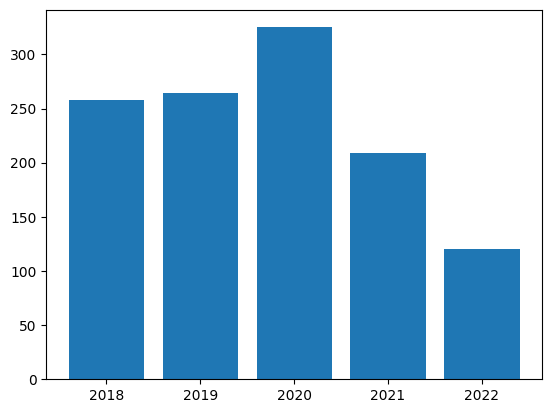

In [24]:
plt.bar(df.index,df['So luong'])
plt.show()

In [72]:
df_square = df_q1_bt_q7.groupby(['Year','District'])['Square(m²)'].agg(['median'])
df_square['median'] = df_square['median']/10
df_square.rename(columns = {'median': 'meansquare'},inplace = True)
df_square

meansquare
Year   District              
2018.0 Bình Thạnh        2.50
       Quận 1            2.50
       Quận 7            2.50
2019.0 Bình Thạnh        2.50
       Quận 1            2.40
       Quận 7            2.20
2020.0 Bình Thạnh        2.50
       Quận 1            2.00
       Quận 7            2.50
2021.0 Bình Thạnh        2.00
       Quận 1            2.00
       Quận 7            2.50
2022.0 Bình Thạnh        2.50
       Quận 1            2.25
       Quận 7            2.00

In [73]:
df_price['meansquare'] = df_square['meansquare']



In [81]:
df_price['Chi so gia tri'] = [1,1.5,0.5] * 5
df_price

meanprice  meansquare  Chi so gia tri  Chi so tang truong
Year   District                                                             
2018.0 Bình Thạnh   2.966346        2.50             1.0            4.279808
       Quận 1       5.740000        2.50             1.5            6.944000
       Quận 7       2.875000        2.50             0.5            3.225000
2019.0 Bình Thạnh   3.559375        2.50             1.0            4.635625
       Quận 1       3.500000        2.40             1.5            5.580000
       Quận 7       3.479310        2.20             0.5            3.527586
2020.0 Bình Thạnh   3.340976        2.50             1.0            4.504585
       Quận 1       3.356250        2.00             1.5            5.413750
       Quận 7       3.140687        2.50             0.5            3.384412
2021.0 Bình Thạnh   3.502381        2.00             1.0            4.501429
       Quận 1       4.400000        2.00             1.5            6.040000
       Quận 7       3.675000        2.50             0.5            3.705000
2022.0 Bình Thạnh   4.327586        2.50             1.0            5.096552
       Quận 1       5.000000        2.25             1.5            6.450000
       Quận 7       3.650000        2.00             0.5            3.590000

In [83]:
df_price['Chi so tang truong'] = df_price['meanprice']*0.6 + df_price['meansquare']*0.2 + df_price['Chi so gia tri'] 

In [84]:
bt = df_price.query('District == "Bình Thạnh"').reset_index()
td = df_price.query('District == "Quận 7"').reset_index()
q1 = df_price.query('District == "Quận 1"').reset_index()

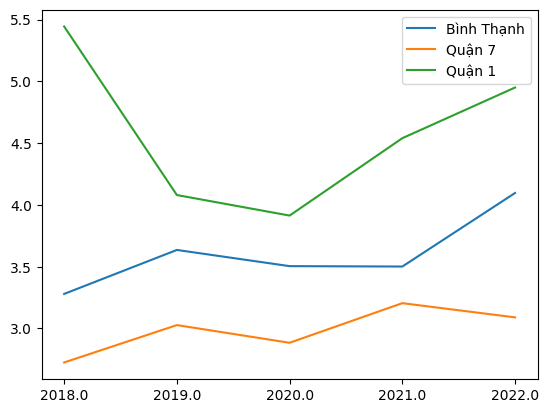

In [86]:
bt['Year'] = bt['Year'].astype(str)
td['Year'] = td['Year'].astype(str)
q1['Year'] = q1['Year'].astype(str)
plt.plot(bt['Year'],bt['Chi so tang truong'],label = 'Bình Thạnh')
plt.plot(td['Year'],td['Chi so tang truong'],label = 'Quận 7')
plt.plot(q1['Year'],q1['Chi so tang truong'],label = 'Quận 1')
plt.legend()
plt.show()

#### Ta thấy vào năm 2018, Quận 1 có chỉ số cao hơn hẳn 2 quận còn lại nhưng qua năm lại giảm rất mạnh ( có thể là do ourlier ), trong khi 2 quận kia tăng nhẹ. Năm 2020 do dịch nên cả 3 quận đều giảm. Qua năm 2021 thì Quận 1 tăng mạnh nhất, Bình Thạnh giảm nhẹ còn TĐ tăng nhẹ.

#### Sự biến động của quận 1 khá lớn, cộng với việc đầu tư quận 1 cũng khá tốn kém nên không nên đầu tư. Quận 7 cũng có sự tăng trưởng nhưng chỉ số lại khá thấp, thậm chí năm 2022 chỉ số này còn đi xuống. Lời khuyên là nên đầu tư vào Bình Thạnh khi quận này tăng trưởng ổn, không quá biến động và chỉ số tăng trưởng cũng vừa phải



## Câu hỏi: Mối liên hệ giữa số bài đăng và giá phòng
### Có người cho rằng, giá cả của phòng trọ, cũng như số lượng phòng trọ trống sẽ khác nhau mỗi thời điểm ở các tháng trong năm, thời điểm có nhiều phòng trọ được đăng lên thì giá sẽ rẻ hơn so với thời điểm ít phòng trọ đăng lên ( quy luật cung cầu, giả sử nhu cầu thuê phòng mỗi tháng là như nhau). Hãy liệt kê giá nhà và số lượng bài đăng lên theo tháng để kiểm chứng điều này.

Thêm cột tháng vào data để dễ xử lý

In [25]:
df_info['Month'] = df_info['Date'].array.month
df_nonnan_date = df_info.dropna(subset = ['Date'])
df_nonnan_date['Month'] = df_nonnan_date['Date'].array.month
#df_nonnan_date['Month'] = df_nonnan_date['Month'].astype(int)
#df_nonnan_date['Month'] = df_nonnan_date['Month'].astype(str)
df_nonnan_date

C:\Users\HP\AppData\Local\Temp\ipykernel_2740\738970183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonnan_date['Month'] = df_nonnan_date['Date'].array.month


,Id,Title,Price(Triệu/tháng),Square(m²),District,City,Date,Month
0,329,Tìm người ở ghép phòng trọ gần ngã 3 Lũy Bán B...,8.4,NaN,Tân Phú,Hồ Chí Minh,2018-05-17,5
1,1110,"Cho thuê phòng trọ 25m2, giờ tự do hẻm 137 Trị...",2.5,25.0,Tân Phú,Hồ Chí Minh,2018-05-14,5
2,1114,Chuyên cho thuê CH Era Town có thể dọn vào ở l...,2.0,15.0,Quận 7,Hồ Chí Minh,2018-05-14,5
3,1275,"Phòng gác lửng, máy lạnh, ban công, WC riêng, ...",3.7,NaN,Quận 7,Hồ Chí Minh,2018-05-14,5
4,1592,Cho thuê phòng full nội thất cho nữ trong căn ...,3.8,NaN,Nhà Bè,Hồ Chí Minh,2018-05-14,5
...,...,...,...,...,...,...,...,...
3409,2112161,"Nhà mới xây, Miễn phí cầu thang máy, điều hòa,...",2.8,25.0,Bình Tân,Hồ Chí Minh,2022-11-15,11
3410,2113773,Cho thuê phòng trọ tại phường 12 - gò vấp,5.5,20.0,Gò Vấp,Hồ Chí Minh,2022-11-17,11
3411,2118730,Cho thuê giường kén CAPSULE CAO CẤP SMART _ Tr...,2.8,30.0,Quận 3,Hồ Chí Minh,2022-11-24,11
3412,2119311,"Cho thuê phòng ĐẸP 16m2 đường Thành Thái-Q10, ...",5.0,16.0,Quận 10,Hồ Chí Minh,2022-11-25,11


In [26]:
df_nonnan_date['Month'].unique()

array([ 5,  6,  7,  8,  9, 11, 10, 12,  1,  3,  2,  4])

Ta tạo 1 dataframe gồm 2 cột là số lượng nhà đăng trong tháng và giá trung bình, index là các tháng trong năm

In [27]:
df_num_price = pd.DataFrame([],index = sorted(df_nonnan_date['Month'].unique()))

Thống kê số lượng phòng đăng lên theo tháng

In [29]:
df_num_price['Num'] = df_nonnan_date['Month'].value_counts().sort_index()

In [40]:
df_num_price['AvePrice'] = df_nonnan_date.groupby(['Month'])['Price(Triệu/tháng)'].median()


In [41]:
df_num_price

,Num,AvePrice
1,61,3.0
2,123,3.0
3,123,3.0
4,65,3.0
5,134,3.3
6,522,3.5
7,802,3.5
8,413,3.8
9,582,3.5
10,291,3.5


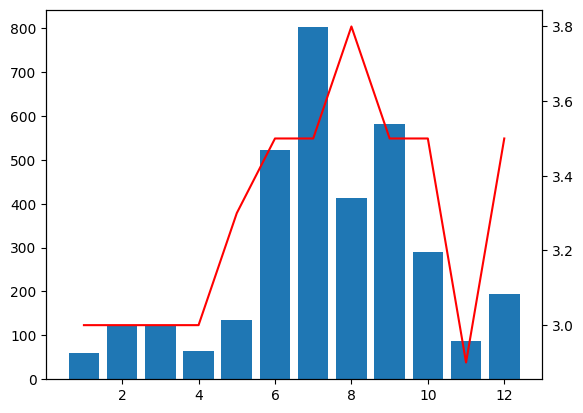

In [46]:
fig,ax = plt.subplots()
ax.bar(df_num_price.index,df_num_price['Num'])

ax2=ax.twinx()
ax2.plot(df_num_price.index,df_num_price['AvePrice'],color="red")
plt.show()

#### Ta thấy giá có vẻ tỉ lệ thuận với số lượng bài đăng. Có sự bất thường ở tháng 7 và tháng 8. Tháng 7 là thời điểm kết thúc năm học nên sinh viên trả phòng nhiều nên số lượng bài đăng tăng, còn tháng 8 là thời điểm sinh viên nhập học đông, tâm lý sợ hết phòng nên họ đã thuê từ trước, bởi vậy số lượng phòng còn lại rất khan hiếm và giá cả vô cùng cao